# Introduction to Copulas

To make our lives extremely simple with the following discusssion, we will focus on continuous random variables. This will really help facilitate subsequent discussions.

## Probability density function

Consider a random variable $X$ with realisation $x$. A probabilitiy density function is a special  type of functions that take $x$ and maps to the likelihood that $X=x$.  Example is the standard normal density distribution function. It is given as 
$$
f(x) = \frac{1}{2\pi}\exp\{-\frac{x^2}{2}\}.
$$
Many people turn to confuse between a density function and an actual probility. A density function rather gives the likelihood/tendency that a random variable $X$ can take the value $x$.  Note that there is an additional constraint that the integral over a density function must be one.  The actual densities themselves might already be larger than one. 

## Cummulative distribution function

As we saw above $f(x)$ represents the probability density function of $X$ at $x$. Cummulative distribution functions on the other hand are defined as 

$$
F(x)=\int_{-\infty}^xf(x)dx
$$


## Probability Integral Transform

Probability integral transform is a very simple concept which is central to the copula theory. Assume that we have a random variable X that comes from a distribution with cummulative density function $F(X)$. Then, we can define a random variable $Y$ as 
$$
Y = F(X).
$$
As we saw before $Y$ is an integral and $Y$ follows a uniform distribution over the interval [0,1].

Let's try to demonstrate this concept in code.  


In [6]:

from scipy import stats
from matplotlib import pyplot as plt
import plotly.express as px


# Sample standard random  values generated
X = stats.norm.rvs(size=10000)

# Compute the comulative probability of each value
X_trans = stats.norm.cdf(X)

# plot the results 
px.histogram(X,title="Original Samples")
px.histogram(X_trans,title="Transformed Samples")

## Copulas 

Multivariate data is often hard model, the key intuition underlying copulas is that the marginal distributions can be modeled independently from the joint distribution. Let's take an example:

Consider a dataset with two variables $age$ and $income$ and our goal is to model their joint distribution. 
Here is the data: 

In [9]:
from copulas.datasets import sample_bivariate_age_income
df = sample_bivariate_age_income()
df.head()

,age,income
0,48.935913,399.161393
1,39.234323,364.225531
2,55.659901,406.475105
3,31.810637,341.276022
4,65.342336,414.347815


The copula approach in modelling the their joint goes as follows:
* Model age and income independently, i.e., get their univariate commulative distribution functions
* Transform them into a uniform  distribution using the probability integral transform explained above
* Model the relationship between the transformed variables using the copula function.
Now we use the term copula again without really telling you what it means.  We will make things clearer as we proceed.  Let's not loose track of the fact that our goal is to model the joint distribution of age and income. Let's start by looking at their marginal distributions.

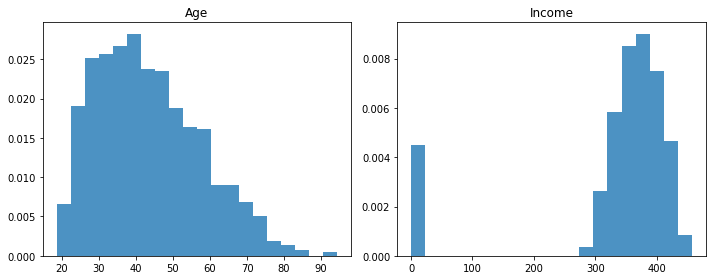

In [10]:
from copulas.visualization import hist_1d, side_by_side

side_by_side(hist_1d, {'Age': df['age'], 'Income': df['income']})